In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()


,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_val, y_train, y_Val = train_test_split(X, y, test_size=0.30, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:


# Create a linear regression model
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_Val, y_pred)
r2 = r2_score(y_Val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 21.51744423117721
R-squared: 0.7112260057484932


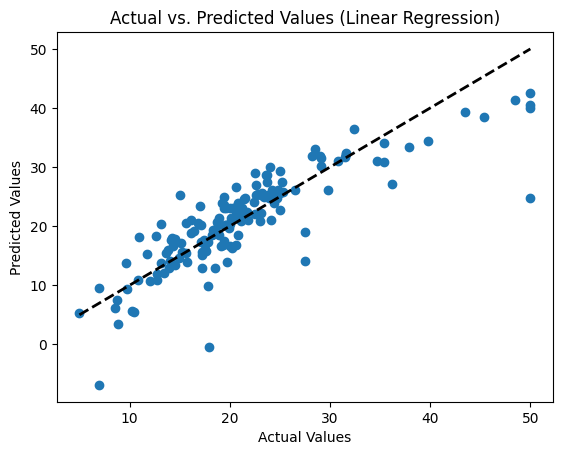

In [ ]:
plt.scatter(y_Val, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.plot([y.min(), y.max()], [y_Val.min(), y_Val.max()], 'k--', lw=2)
plt.show()


In [ ]:
model.intercept_

23.01581920903955

In [ ]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):

  n_samples, n_features = X.shape
  weights = np.zeros(n_features)
  intercept = 0
  cost_history = []

  for _ in range(num_iterations):
    y_predicted = np.dot(X, weights) + intercept
    dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
    db = (1 / n_samples) * np.sum(y_predicted - y)

    weights -= learning_rate * dw
    intercept -= learning_rate * db
    cost = (1 / (2 * n_samples)) * np.sum((y_predicted - y) ** 2)  # Calculate cost
    cost_history.append(cost)

  return weights, intercept, cost_history


weights_gd, intercept_gd , cost_history = gradient_descent(X_train, y_train)
print("Weights (Gradient Descent):", weights_gd)
print("Intercept (Gradient Descent):", intercept_gd)


y_pred_gd = np.dot(X_val, weights_gd) + intercept_gd


mse_gd = mean_squared_error(y_Val, y_pred_gd)
r2_gd = r2_score(y_Val, y_pred_gd)

print(f"Gradient Descent Mean Squared Error: {mse_gd}")
print(f"Gradient Descent R-squared: {r2_gd}")

Weights (Gradient Descent): [-9.69373636e-01  5.45987220e-01  1.76847868e-03  8.73223252e-01
 -1.33752027e+00  3.05105402e+00 -3.61430870e-01 -2.54397395e+00
  1.11473603e+00 -5.19153805e-01 -1.95039777e+00  1.02173819e+00
 -3.85378854e+00]
Intercept (Gradient Descent): 23.014825587414126
Gradient Descent Mean Squared Error: 22.442350292815007
Gradient Descent R-squared: 0.6988133411747153


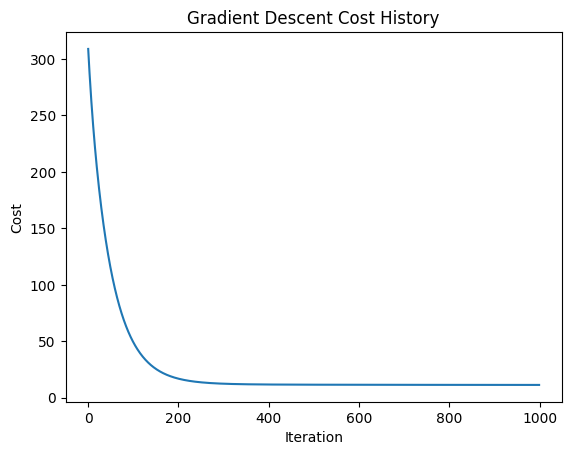

In [ ]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Gradient Descent Cost History")
plt.show()